In [83]:
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.utils import to_categorical
import cv2
import  random
from sklearn.preprocessing import LabelEncoder
import pickle
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout ,Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
import matplotlib.pyplot as plt

In [4]:
category = os.listdir('Soil types')
category

['Alluvial soil', 'Black Soil', 'Clay soil', 'Laterite Soil', 'Red soil']

In [8]:
def preprocessing(dirpath, category):
    array =[]
    for cat in category:
        path = os.path.join(dirpath, cat)
        for img in os.listdir(path):
            img_path = os.path.join(path, img)
            imgarray = cv2.imread(img_path)/255.0
            imgarray = cv2.resize(imgarray, (224, 224))
            array.append([imgarray, cat])
    random.shuffle(array)
    return array        

In [60]:
array = preprocessing('Soil types', category)

In [13]:
len(array)

358

In [61]:
train_data, test_data = array[:300], array[300:]

In [62]:
len(train_data), len(test_data)

(300, 58)

In [63]:
X_train = []
y_train = []
for features, label in train_data:
    X_train.append(features)
    y_train.append(label)

len(X_train), len(y_train)

(300, 300)

In [64]:
X_test = []
y_test = []
for features, label in test_data:
    X_test.append(features)
    y_test.append(label)
    
len(X_test), len(y_test)

(58, 58)

In [65]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [66]:
X_train.dtype

dtype('float64')

In [67]:
X_train.shape, X_test.shape

((300, 224, 224, 3), (58, 224, 224, 3))

In [29]:
label_encoder = LabelEncoder()

In [31]:
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [33]:
label_encoder.classes_

array(['Alluvial soil', 'Black Soil', 'Clay soil', 'Laterite Soil',
       'Red soil'], dtype='<U13')

In [38]:
with open('models/label_encoder_soil_classification.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

In [35]:
num_classes = len(label_encoder.classes_)

In [39]:
y_train_one_hot = to_categorical(y_train_encoded, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test_encoded, num_classes= num_classes)

In [40]:
y_train_one_hot

array([[0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [44]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape = (224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

f:\Crop Prediction\crop-env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,170,501 (42.61 MB)

 Trainable params: 11,170,053 (42.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [46]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [52]:
history = model.fit(X_train, y_train_one_hot, validation_split=0.1, batch_size=32, epochs=20)

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.3963 - loss: 20.3035 - val_accuracy: 0.3667 - val_loss: 3.7150
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.6025 - loss: 14.8632 - val_accuracy: 0.2000 - val_loss: 20.6926
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.5789 - loss: 11.3553 - val_accuracy: 0.2000 - val_loss: 56.6035
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.6670 - loss: 3.7790 - val_accuracy: 0.2000 - val_loss: 70.5103
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.6534 - loss: 1.8258 - val_accuracy: 0.2000 - val_loss: 69.9724
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.6013 - loss: 1.2823 - val_accuracy: 0.2000 - val_loss: 63.0537
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.6244 - loss: 1.1950 - val_accuracy: 0.2000 - val_loss: 45.8740
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.5934 - loss: 1.5357 - val_accuracy: 0.2000 - val_loss: 41.385

In [53]:
model.evaluate(X_test, y_test_one_hot)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step - accuracy: 0.2108 - loss: 14.4322


[15.421500205993652, 0.2068965584039688]

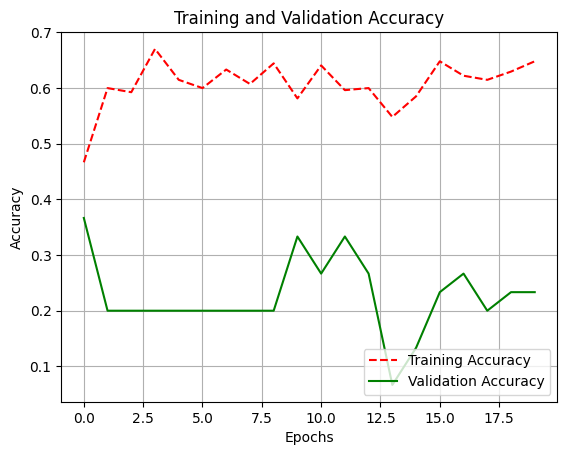

In [84]:
plt.plot(history.history['accuracy'], 'r--', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], 'g-', label='Validation Accuracy')  
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower right')
plt.show()


In [ ]:
datagen = ImageDataGenerator(
    rescale=1.0/255,  
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest' 
)

datagen.fit(X_train)


In [79]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [96]:
for layer in base_model.layers:
    layer.trainable = False

In [81]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_3[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,422,597 (9.24 MB)

 Trainable params: 164,613 (643.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [97]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [98]:
history=model.fit(X_train, y_train_one_hot, batch_size=16, epochs=30, validation_split = 0.1)

Epoch 1/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 666ms/step - accuracy: 0.2516 - loss: 3.7681 - val_accuracy: 0.1333 - val_loss: 1.8054
Epoch 2/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 526ms/step - accuracy: 0.2087 - loss: 1.8009 - val_accuracy: 0.2667 - val_loss: 1.6799
Epoch 3/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 447ms/step - accuracy: 0.2490 - loss: 1.5554 - val_accuracy: 0.1667 - val_loss: 1.6266
Epoch 4/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 503ms/step - accuracy: 0.2928 - loss: 1.5622 - val_accuracy: 0.2667 - val_loss: 1.6191
Epoch 5/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 561ms/step - accuracy: 0.2911 - loss: 1.5660 - val_accuracy: 0.2000 - val_loss: 1.6421
Epoch 6/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 540ms/step - accuracy: 0.2735 - loss: 1.5923 - val_accuracy: 0.2667 - val_loss: 1.6377
Epoch 7/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 570ms/step - accuracy: 0.3257 - loss: 1.5228 - val_accuracy: 0.2000 - val_loss: 1.6076
Epoch 8/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 583ms/step - accuracy: 0.3043 - loss: 1.5477 - val_accuracy

In [88]:
model.evaluate(X_test, y_test_one_hot)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 682ms/step - accuracy: 0.2996 - loss: 2.4163


[2.373386859893799, 0.2931034564971924]

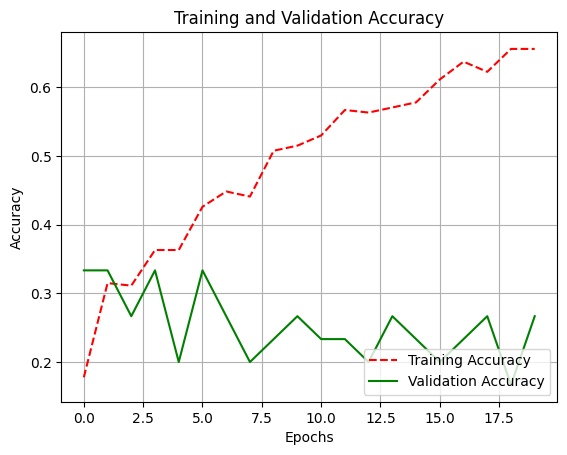

In [89]:
plt.plot(history.history['accuracy'], 'r--', label='Training Accuracy') 
plt.plot(history.history['val_accuracy'], 'g-', label='Validation Accuracy') 
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower right')
plt.show()


In [99]:
model.save('models/soilClassification.keras')

In [90]:
for layer in base_model.layers:
    layer.trainable = True


In [91]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [92]:
history=model.fit(X_train, y_train_one_hot, batch_size=16, epochs=20, validation_split = 0.1)

Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 85s 3s/step - accuracy: 0.2793 - loss: 2.0785 - val_accuracy: 0.2333 - val_loss: 5.4546
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.3179 - loss: 1.5496 - val_accuracy: 0.3333 - val_loss: 6.0597
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.2942 - loss: 1.5555 - val_accuracy: 0.2333 - val_loss: 5.4411
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.3596 - loss: 1.4429 - val_accuracy: 0.2333 - val_loss: 5.7090
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.4272 - loss: 1.4141 - val_accuracy: 0.3333 - val_loss: 4.1489
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.4806 - loss: 1.2598 - val_accuracy: 0.3000 - val_loss: 5.9511
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.4940 - loss: 1.2879 - val_accuracy: 0.2333 - val_loss: 6.9441
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.4708 - loss: 1.3035 - val_accuracy: 0.1667 - val_loss:

In [93]:
model.evaluate(X_test, y_test_one_hot)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 733ms/step - accuracy: 0.2662 - loss: 7.2546


[7.065059185028076, 0.2586206793785095]

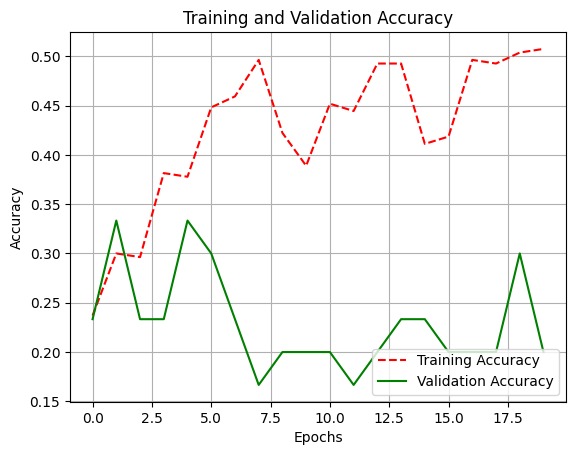

In [94]:
plt.plot(history.history['accuracy'], 'r--', label='Training Accuracy') 
plt.plot(history.history['val_accuracy'], 'g-', label='Validation Accuracy') 
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower right')
plt.show()
